# PS3-5: K-means for compression

## Import Library

In [661]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

## Load Image

In [662]:
A = imread('/home/anhnt02/Desktop/CS229-Fall2018-FullCourse/Full_Problem_Set/PS3/data/peppers-small.tiff')

## Show Image

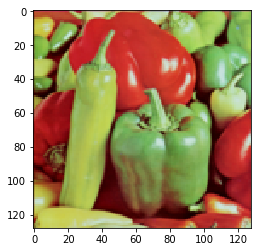

In [663]:
plt.imshow(A)
plt.show()

## a) Training K-Mean Model

### Training Algorithm

#### 1. Initialize Cluster Centroids

In [664]:
def initialize_centroid(img, K):
    # 1. Get Size of the Image
    height, width, channels = img.shape

    # 2. Initialize Cluster Centroids
    mu = []
    for j in range(K):
        # Random 1 point in the Image
        x = np.random.randint(0, width)
        y = np.random.randint(0, height)

        # Get RGB-Values
        rgb_value = img[y, x]

        mu.append(rgb_value)
    mu = np.array(mu)

    return mu

#### 2. Repeat until Convergence

In [665]:
def update_c(img, mu, K):
    # 1. Get Size of the Image
    height, width, channels = img.shape

    # 2. Update c
    c = np.zeros((height, width), dtype=int)
    for y in range(height):
        for x in range(width):
            rgb_value = img[y, x]
            min_value = 1e9
            idx_min = 0
            for j in range(K):
                diff_norm = np.linalg.norm(rgb_value - mu[j])**2
                if diff_norm < min_value:
                    min_value = diff_norm
                    idx_min = j

            #Assign cluster c
            c[y, x] = idx_min

    return c

In [666]:
def update_mu(img, c, mu, K):
    # 1. Get Size of the Image
    height, width, channels = img.shape

    # 2. Update mu
    for j in range(K):
        numerator = np.zeros(img[0, 0].size)
        denominator = 0
        for y in range(height):
            for x in range(width):
                if c[y, x] == j:
                    numerator += 1 * img[y, x]
                    denominator += 1

        #Update new mu[j]
        if denominator != 0:
            mu[j] = numerator / denominator

    return mu

### Training Model

In [667]:
def cost_function(img, c, mu):
    # 1. Get Size of the Image
    height, width, channels = img.shape

    # 2. Calculate Cost Function
    cost_value = 0
    for y in range(height):
        for x in range(width):
            j = int(c[y, x])
            cost_value += np.linalg.norm(img[y, x] - mu[j])**2

    return cost_value

In [668]:
def training_k_mean(img, max_iter, K):
    mu = initialize_centroid(img, K)
    c = None
    J = 0

    for it in range(max_iter):
        ### Run Algorithm
        # a. Update c
        c = update_c(img, mu, K)

        # b. Update mu
        mu = update_mu(img, c, mu, K)

        ### Calculate Cost Function
        J = cost_function(img, c, mu)

        print(f"Iteration: {it + 1}, Cost: {J:.2f}")

    return c, mu, J

In [669]:
#Load Image
A_small = imread('/home/anhnt02/Desktop/CS229-Fall2018-FullCourse/Full_Problem_Set/PS3/data/peppers-small.tiff')
c, mu, J = training_k_mean(A_small, max_iter=30, K=16)

Iteration: 1, Cost: 1534707074.00
Iteration: 2, Cost: 1544744416.00
Iteration: 3, Cost: 1492736133.00
Iteration: 4, Cost: 1363174040.00
Iteration: 5, Cost: 1535198205.00
Iteration: 6, Cost: 1534760292.00
Iteration: 7, Cost: 1517634547.00
Iteration: 8, Cost: 1517560316.00
Iteration: 9, Cost: 1489046724.00
Iteration: 10, Cost: 1583046495.00
Iteration: 11, Cost: 1464047628.00
Iteration: 12, Cost: 1531514461.00
Iteration: 13, Cost: 1454677250.00
Iteration: 14, Cost: 1496349708.00
Iteration: 15, Cost: 1531466157.00
Iteration: 16, Cost: 1372381622.00
Iteration: 17, Cost: 1484889272.00
Iteration: 18, Cost: 1353184211.00
Iteration: 19, Cost: 1428349818.00
Iteration: 20, Cost: 1399045966.00
Iteration: 21, Cost: 1531663625.00
Iteration: 22, Cost: 1450257481.00
Iteration: 23, Cost: 1394797369.00
Iteration: 24, Cost: 1379549050.00
Iteration: 25, Cost: 1508308449.00
Iteration: 26, Cost: 1569979947.00
Iteration: 27, Cost: 1411894322.00
Iteration: 28, Cost: 1427947394.00
Iteration: 29, Cost: 14205304

### Results: Apply to Compressed Large Image

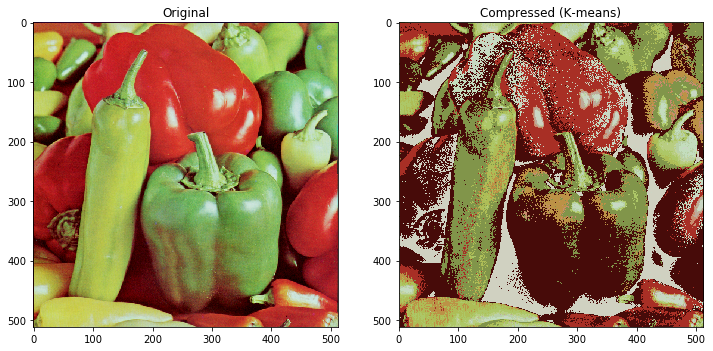

In [670]:
# APPLY TO IMAGE
A_large = imread('/home/anhnt02/Desktop/CS229-Fall2018-FullCourse/Full_Problem_Set/PS3/data/peppers-large.tiff')
height, width, channels = A_large.shape
A_compressed = np.zeros(A_large.shape)

K = 16

# 1. Estimate c-cluster points in Image
c_compressed = update_c(A_large, mu, K)

# 2. Compressed Image
for y in range(height):
    for x in range(width):
        A_compressed[y, x] = mu[c_compressed[y, x]]

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.imshow(A_large)
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(A_compressed.astype(np.uint8))
plt.title("Compressed (K-means)")

plt.show()

## b) Compressed Factor

In original Image, we need 3 x 8 = 24 bits (each R, G, B channel need 8 bits) to represent 1 pixel.

In compressed Image, we only need log2(16) = 4 bits to represent 1 pixel.

The image is compressed by factor 24/4 = 6.